In [1]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
import libpysal
from shapely.geometry import Polygon


## Planar Enforcement Violation: non-planar enforced touches

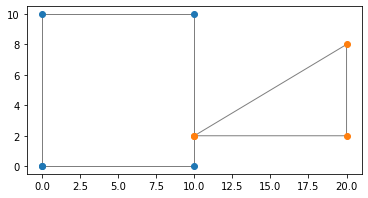

In [2]:
c1 = [[0,0], [0, 10], [10, 10], [10, 0], [0, 0]]
p1 = Polygon(c1)
c2 = [[10, 2], [20, 8], [20, 2], [10, 2]]
p2 = Polygon(c2)
gdf = geopandas.GeoDataFrame(geometry=[p1, p2])
base = gdf.plot(edgecolor='k', facecolor="none",alpha=0.5)
c1 = numpy.array(c1)
c2 = numpy.array(c2)
_ = base.scatter(c1[:,0], c1[:,1])
_ =base.scatter(c2[:,0], c2[:,1])



The two polygons are visually contiguous share no vertices. This will result in the two polygons not being Queen neighbors, since a necessary (and sufficient) condition for the latter is at least one shared vertex.

In [3]:
w = libpysal.weights.Queen.from_dataframe(gdf)

/home/serge/Dropbox/p/pysal/src/subpackages/libpysal/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There are 2 islands with ids: 0, 1.
  warnings.warn(message)


## Detecting nonplanar touches

`geoplanar` can detect and report nonplanar edges:

In [4]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {0: {1}})

## Fixing nonplanar edges

In [5]:
gdf1 = geoplanar.fix_npe_edges(gdf)

In [6]:
geoplanar.non_planar_edges(gdf1)

defaultdict(set, {})

In [7]:
w1 = libpysal.weights.Queen.from_dataframe(gdf1)
w1.neighbors

{0: [1], 1: [0]}

## Default is to work on a copy

In [8]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {0: {1}})

In [9]:
geoplanar.fix_npe_edges(gdf, inplace=True) 


,geometry
0,"POLYGON ((0.00000 0.00000, 0.00000 10.00000, 1..."
1,"POLYGON ((10.00000 2.00000, 20.00000 8.00000, ..."


In [10]:
geoplanar.non_planar_edges(gdf)

defaultdict(set, {})

In [11]:
w = libpysal.weights.Queen.from_dataframe(gdf)
w.neighbors

{0: [1], 1: [0]}